## Optical metrology - Assignment 2.
**Code by Fernando Quintero.**  16/sept/2021


In [5]:
from google.colab import files
uploaded = files.upload()

Saving standard-3dX.csv to standard-3dX.csv
Saving standard-3dY.csv to standard-3dY.csv
Saving standard-3dZ.csv to standard-3dZ.csv


In [28]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np
import cv2

# Read the data(depthmap) of the 3D reconstruction. 
X = np.genfromtxt('standard-3dX.csv', delimiter=',')
Y = np.genfromtxt('standard-3dY.csv', delimiter=',')
Z = np.genfromtxt('standard-3dZ.csv', delimiter=',')

print(Z.shape)

(1024, 1280)


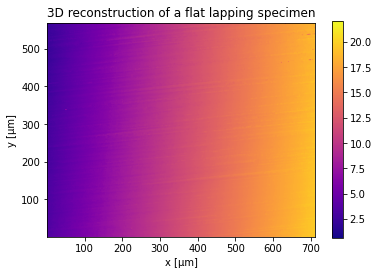

In [29]:
# Plot 3D reconstruction of the falt lapping specimen
im = plt.imshow(Z, extent=[X[0][0], X[0][-1], Y[0][0], Y[-1][0]],cmap='plasma')

plt.xlabel('x [μm]')
plt.ylabel('y [μm]')
plt.title('3D reconstruction of a flat lapping specimen')
plt.colorbar(im)
plt.show()

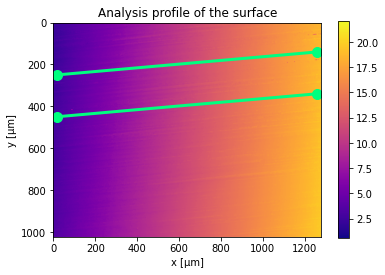

In [27]:
im = plt.imshow(Z,cmap = 'plasma')

plt.plot([15, 1260], [250, 140], 'o-', linewidth=3, markersize=10, color='springgreen') # Profile 
plt.plot([15, 1260], [450, 340], 'o-', linewidth=3, markersize=10, color='springgreen') # 
plt.xlabel('x [μm]')
plt.ylabel('y [μm]')
plt.title('Analysis profile of the surface')
plt.colorbar(im)
plt.show()

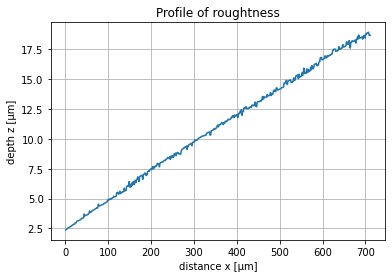

In [24]:
# Extract profile
from skimage.measure import profile_line
x_profile = profile_line(X, (250, 1), (140, 1280), mode = 'nearest')
y_profile = profile_line(Y, (250, 1), (140, 1280), mode = 'nearest')
z_profile = profile_line(Z, (250, 1), (140, 1280), mode = 'nearest')

plt.plot(x_profile, z_profile)
plt.xlabel('distance x [μm]')
plt.ylabel('depth z [μm]')
plt.title('Profile of roughtness')
plt.grid()
plt.show()

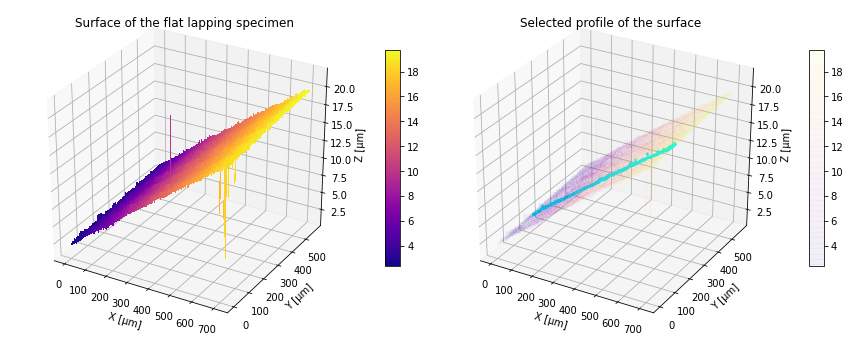

In [ ]:
# Plot surface

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1,projection='3d')

ax.plot(x_profile, y_profile, z_profile, 'o', linewidth=1, markersize=1, color='springgreen')
surf = ax.plot_surface(X, Y, Z, cmap='plasma', linewidth=0, antialiased=False, alpha=1)

cbax = fig.add_axes([0.50, 0.28, 0.015, 0.5])
fig.colorbar(surf, shrink=0.5, aspect=10, cax=cbax)

ax.set_title('Surface of the flat lapping specimen')
ax.set_xlabel('X [μm]')
ax.set_ylabel('Y [μm]')
ax.set_zlabel('Z [μm]')

# Plot surface with roughtness profile

ax = fig.add_subplot(1, 2, 2,projection='3d',facecolor=None)
ax.set_facecolor("none")

ax.plot(x_profile, y_profile, z_profile, 'o', linewidth=1, markersize=1, color='cyan')
surf = ax.plot_surface(X, Y, Z, cmap='plasma', linewidth=0, antialiased=False, alpha=0.03)

cbax2 = fig.add_axes([0.92, 0.28, 0.015, 0.5])
fig.colorbar(surf, shrink=0.5, aspect=10, cax=cbax2)

ax.set_title('Selected profile of the surface')
ax.set_xlabel('X [μm]')
ax.set_ylabel('Y [μm]')
ax.set_zlabel('Z [μm]')

plt.show()

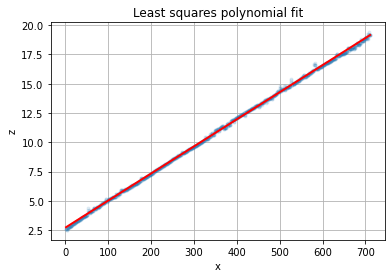

In [ ]:
# polyfit computes the coefficients via Least Squares
p = np.polyfit(x_profile,z_profile,1)

zp = np.poly1d(p)

xp = np.linspace(x_profile[1], x_profile[-1], z_profile.shape[0])

plt.plot(x_profile,z_profile,'.', alpha = 0.1)
plt.plot(xp,zp(xp),'r' ,linewidth=2,)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Least squares polynomial fit')
plt.grid()
plt.show()


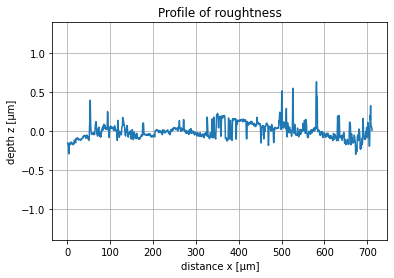

In [ ]:
z_procesed = z_profile - zp(xp)
plt.plot(x_profile,z_procesed)
plt.xlabel('distance x [μm]')
plt.ylabel('depth z [μm]')
plt.title('Profile of roughtness')
plt.ylim(-1.4, 1.4)
plt.grid()
plt.show()

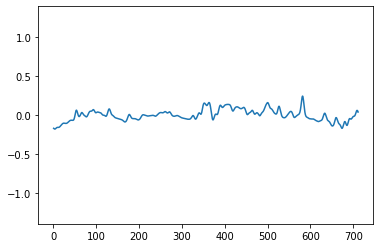

In [ ]:
z_profile_filtered = gaussian_filter1d(z_procesed, 5, mode='nearest')
plt.plot(x_profile,z_profile_filtered)
plt.ylim(-1.4, 1.4)
plt.show()

In [ ]:
Ra_profile = np.sum(np.abs(z_profile_filtered))/z_profile_filtered.size
print(np.std(np.abs(z_profile_filtered)))
print(Ra_profile)

0.0459774879129591
0.05630465339142527
